# HOME LOAN DEFAULT RISK MANAGEMENT

# Data Description

●	application_train.csv
○	The main file which contains the Target(1:Defaulter ; 0: Not Defaulter)
○	Static data for all applications. One row represents one loan in our data sample.

●	bureau.csv
○	All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
○	For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

●	bureau_balance.csv
○	Monthly balances of previous credits in Credit Bureau.
○	This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

●	POS_CASH_balance.csv
○	Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
○	This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

●	credit_card_balance.csv
○	Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
○	This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

●	previous_application.csv
○	All previous applications for Home Credit loans of clients who have loans in our sample.
○	There is one row for each previous application related to loans in our data sample.

●	installments_payments.csv
○	Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
○	There is a) one row for every payment that was made plus b) one row each for missed payment.
○	One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

Domain: Banking

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

The project involves handling a large amount of data with numerous columns and rows.
To streamline the process, I've extracted a sample from the dataset.

In [2]:
data = pd.read_csv("final_data.csv")

In [3]:
data.drop("Unnamed: 0",axis=1,inplace=True) # remove the unwanted columns in data

In [4]:
data

,SK_ID_CURR_x,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CONTRACT_STATUS,SK_DPD_y,SK_DPD_DEF_y,SK_ID_CURR_y,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,201048,0,Cash loans,F,N,Y,0,225000.0,768550.5,33984.0,...,Active,0,0,201048,0.0,97,-239.0,-239.0,0.810,0.810
1,169660,0,Cash loans,F,N,Y,0,238500.0,437877.0,21195.0,...,Active,0,0,169660,0.0,14,-978.0,-978.0,171.360,171.360
2,113896,0,Cash loans,F,N,Y,0,157500.0,314100.0,16164.0,...,Active,0,0,113896,0.0,122,-1454.0,-1459.0,5400.000,5400.000
3,330152,0,Cash loans,M,N,Y,0,180000.0,384048.0,18810.0,...,Active,0,0,330152,0.0,105,-816.0,-816.0,4500.000,4500.000
4,321874,0,Cash loans,F,N,Y,0,157500.0,521280.0,31630.5,...,Active,0,0,321874,0.0,78,-1457.0,-1457.0,199.710,199.710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616653,254924,0,Cash loans,F,N,Y,0,135000.0,486000.0,23508.0,...,Active,1,1,254924,0.0,19,-2294.0,-2294.0,2250.000,2250.000
616654,336515,1,Cash loans,M,Y,N,0,135000.0,481176.0,26230.5,...,Active,0,0,336515,0.0,108,-42.0,-42.0,224.055,224.055
616655,154519,0,Cash loans,F,N,N,0,211500.0,1113840.0,47322.0,...,Active,0,0,154519,0.0,3,-2742.0,-2748.0,3375.000,3375.000
616656,359634,0,Cash loans,F,Y,Y,2,270000.0,547344.0,26460.0,...,Active,0,0,359634,0.0,1,-2913.0,-2920.0,3375.000,3375.000


In [5]:
data.isnull().sum().sort_values(ascending=False).head(30)/len(data)*100  
# sorting the null values percentage in ascending order

DAYS_FIRST_DRAWING            39.786073
DAYS_LAST_DUE                 39.786073
NFLAG_INSURED_ON_APPROVAL     39.786073
OCCUPATION_TYPE               33.839665
DAYS_ENDDATE_FACT             26.222963
AMT_GOODS_PRICE_y             23.594115
AMT_ANNUITY_y                 19.485841
CNT_PAYMENT                   19.485841
AMT_CREDIT_SUM_DEBT           18.428529
DAYS_CREDIT_ENDDATE            5.789108
CNT_INSTALMENT_MATURE_CUM      2.044569
AMT_INST_MIN_REGULARITY        2.044569
EXT_SOURCE_3                   1.960730
AMT_DRAWINGS_POS_CURRENT       1.018555
CNT_DRAWINGS_POS_CURRENT       1.018555
CNT_DRAWINGS_OTHER_CURRENT     1.018555
CNT_DRAWINGS_ATM_CURRENT       1.018555
AMT_DRAWINGS_ATM_CURRENT       1.018555
AMT_DRAWINGS_OTHER_CURRENT     1.018555
AMT_PAYMENT_CURRENT            1.006393
PRODUCT_COMBINATION            0.085461
CNT_INSTALMENT                 0.062920
CNT_INSTALMENT_FUTURE          0.062920
NAME_TYPE_SUITE_x              0.039244
AMT_PAYMENT                    0.006649


In [6]:
pd.set_option("display.max_columns",None)

In [7]:
data.describe(include = "all")    # describing  the all data points in data_set

,SK_ID_CURR_x,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV_x,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS_x,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE_x,STATUS,SK_ID_PREV_y,MONTHS_BALANCE_y,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS_y,SK_DPD_x,SK_DPD_DEF_x,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD_y,SK_DPD_DEF_y,SK_ID_CURR_y,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,616658.000000,616658.000000,616658,616658,616658,616658,616658.000000,6.166580e+05,6.166580e+05,616636.000000,6.166580e+05,616416,616658,616658,616658,616658,616658.000000,616658.000000,616658.000000,616658.000000,616658.000000,616658.0,616658.000000,616658.000000,616658.000000,616658.000000,616658.000000,407983,616658.000000,616658.000000,616658.000000,616658,616658.000000,616658.000000,616658.000000,616658.000000,616658.000000,616658.000000,616658.000000,616658,616658.000000,604567.000000,616658.000000,616658.000000,616658.000000,616658.000000,616658.000000,616658.0,616658.000000,616658.000000,616658.000000,616658.000000,616658.0,616658.000000,616658.000000,616658.0,616658.000000,616658.0,616658.000000,616658.000000,616658.000000,616658.000000,616658.0,616658.000000,616658.000000,616658.000000,616658.0,616658.000000,616658.000000,616658.000000,616658.000000,616658.000000,616658.000000,6.166580e+05,616658,496497.000000,6.166580e+05,6.166580e+05,4.711630e+05,616658,616658.000000,616658,616658.000000,616658,616658,616658.00000,616658,616658,616658,616658,616658,616658,616658,616658.000000,616658,496497.000000,616658,616131,371314.000000,371314.000000,371

In [8]:
data.describe(include = "O")

,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START_x,ORGANIZATION_TYPE,NAME_CONTRACT_TYPE_y,WEEKDAY_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS_x,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE,STATUS,NAME_CONTRACT_STATUS_y,NAME_CONTRACT_STATUS
count,616658,616658,616658,616658,616416,616658,616658,616658,616658,407983,616658,616658,616658,616658,616658,616658,616658,616658,616658,616658,616658,616658,616658,616658,616658,616658,616131,616658,616658,616658,616658,616658,616658
unique,2,2,2,2,7,4,5,5,6,18,7,55,4,7,2,23,4,4,9,4,24,5,3,8,11,5,17,3,3,10,8,5,5
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,MONDAY,XNA,Cash loans,THURSDAY,Y,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,Cash,XNA,Credit and cash offices,XNA,XNA,Cash,Closed,currency 1,Consumer credit,C,Active,Active
freq,616266,466884,406249,442467,528365,303659,454170,446802,574316,97844,108858,120763,354412,99645,611262,325220,386775,403466,483884,593980,414984,251270,315867,310545,362431,169682,103142,454444,615982,432097,292214,563731,594565


In [9]:
nul_col = ["FLAG_MOBIL","FLAG_DOCUMENT_2","FLAG_DOCUMENT_7","FLAG_DOCUMENT_10","FLAG_DOCUMENT_12","FLAG_DOCUMENT_17",
          "FLAG_DOCUMENT_21","NUM_INSTALMENT_VERSION"]

In [10]:
data.drop(nul_col,axis=1,inplace=True)

In [11]:
data

,SK_ID_CURR_x,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV_x,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS_x,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE_x,STATUS,SK_ID_PREV_y,MONTHS_BALANCE_y,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS_y,SK_DPD_x,SK_DPD_DEF_x,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD_y,SK_DPD_DEF_y,SK_ID_CURR_y,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,201048,0,Cash loans,F,N,Y,0,225000.0,768550.5,33984.0,621000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,Municipal apartment,0.014464,-18743,365243,-482.0,-2287,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,4,0,0,0,0,0,0,XNA,0.472596,0.355639,1.0,0.0,1.0,0.0,-2644.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0,1672049,Consumer loans,12804.615,211518.0,247815.0,211518.0,WEDNESDAY,9,Y,1,XAP,Approved,-896,XNA,XAP,Repeater,Audio/Video,POS,XNA,Country-wide,943,Consumer electronics,24.0,low_normal,POS household with interest,365243.0,-205.0,0.0,6684137,Closed,currency 1,-1889,0,-1524.0,-1524.0,0,90000.00,0.0,0.0,Consumer credit,-1521,-30,C,1672046,-32,24.0,21.0,Active,0,0,2788874,-29,35238.375,67500,0.0,0.0,0.0,0.0,3375.000,3375.000,3375.0,33561.540,35238.375,35238.375,0.0,0,0.0,0.0,51.0,Active,0,0,201048,97,-239.0,-239.0,0.810,0.810
1,169660,0,Cash loans,F,N,Y,0,238500.0,437877.0,21195.0,378000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.031329,-20690,-3588,-3118.0,-4126,1,0,1,0,0,Laborers,2.0,2,2,SATURDAY,11,0,0,0,0,0,0,Postal,0.615593,0.526295,1.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,0.0,5.0,1863252,Cash loans,NaN,0.0,0.0,NaN,WEDNESDAY,11,Y,1,XNA,Canceled,-3,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,N

In [12]:
num_col = data.select_dtypes(np.number)

In [13]:
num_col

,SK_ID_CURR_x,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV_x,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE_x,SK_ID_PREV_y,MONTHS_BALANCE_y,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD_x,SK_DPD_DEF_x,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD_y,SK_DPD_DEF_y,SK_ID_CURR_y,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,201048,0,0,225000.0,768550.5,33984.0,621000.0,0.014464,-18743,365243,-482.0,-2287,0,0,1,0,0,2.0,2,2,4,0,0,0,0,0,0,0.472596,0.355639,1.0,0.0,1.0,0.0,-2644.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0,1672049,12804.615,211518.0,247815.0,211518.0,9,1,-896,943,24.0,365243.0,-205.0,0.0,6684137,-1889,0,-1524.0,-1524.0,0,90000.00,0.0,0.0,-1521,-30,1672046,-32,24.0,21.0,0,0,2788874,-29,35238.375,67500,0.0,0.0,0.0,0.0,3375.000,3375.000,3375.0,33561.540,35238.375,35238.375,0.0,0,0.0,0.0,51.0,0,0,201048,97,-239.0,-239.0,0.810,0.810
1,169660,0,0,238500.0,437877.0,21195.0,378000.0,0.031329,-20690,-3588,-3118.0,-4126,1,0,1,0,0,2.0,2,2,11,0,0,0,0,0,0,0.615593,0.526295,1.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,0.0,5.0,1863252,NaN,0.0,0.0,NaN,11,1,-3,-1,NaN,NaN,NaN,NaN,5399090,-1892,0,-1562.0,-1562.0,0,56574.00,0.0,0.0,-1217,-10,2038490,-38,36.0,30.0,0,0,2643374,-1,224050.995,225000,220500.0,225360.9,0.0,4860.9,3671.415,9000.000,9000.0,208789.425,213286.995,213286.995,9.0,12,0.0,3.0,35.0,0,0,169660,14,-978.0,-978.0,171.360,171.360
2,113896,0,0,157500.0,314100.0,16164.0,225000.0,0.035792,-17008,-7573,-10140.0,-556,1,0,1,0,0,2.0,2,2,15,0,0,0,0,0,0,0.683154,0.535276,1.0,0.0,1.0,0.0,-2383.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,8.0,2297708,NaN,0.0,0.0,NaN,9,1,-122,-1,NaN,NaN,NaN,NaN,5876502,-2385,0,-1290.0,-1285.0,0,463320.00,0.0,0.0,-1283,-58,1294313,-11,36.0,16.0,0,0,2826946,-13,272362.770,270000,0.0,0.0,0.0,0.0,16200.000,16200.000,16200.0,261245.520,272362.770,272362.770,0.0,0,0.0,0.0,94.0,0,0,113896,122,-1454.0,-1459.0,5400.000,5400.000
3,330152,0,0,180000.0,384048.0,18810.0,270000.0,0.032561,-15586,-5215,-5751.0,-4643,1,0,1,0,0,1.0,1,1,18,0,0,0,0,0,0,0.351613,0.240541,3.0,0.0,3.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,9.0,0.0,5.0,2843705,13871.700,229500.0,260550.0,229500.0,18,1,-473,100,30.0,NaN,NaN,NaN,5668046,-882,0,-499.0,-624.0,0,52200.00,0.0,0.0,-61

In [14]:
num_null_col = num_col.isnull().sum().sort_values(ascending=False).head(24).index

In [15]:
num_null_col

Index(['DAYS_FIRST_DRAWING', 'DAYS_LAST_DUE', 'NFLAG_INSURED_ON_APPROVAL',
       'DAYS_ENDDATE_FACT', 'AMT_GOODS_PRICE_y', 'CNT_PAYMENT',
       'AMT_ANNUITY_y', 'AMT_CREDIT_SUM_DEBT', 'DAYS_CREDIT_ENDDATE',
       'AMT_INST_MIN_REGULARITY', 'CNT_INSTALMENT_MATURE_CUM', 'EXT_SOURCE_3',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_PAYMENT_CURRENT', 'CNT_INSTALMENT_FUTURE', 'CNT_INSTALMENT',
       'DAYS_ENTRY_PAYMENT', 'AMT_PAYMENT', 'AMT_ANNUITY_x'],
      dtype='object')

In [16]:
for i in num_null_col:
    data[i] = data[i].fillna(data[i].median())

In [17]:
cat_col=data.select_dtypes(include = 'object')

In [18]:
cat_col.isnull().sum().sort_values(ascending=False).head(30)/len(cat_col)*100

OCCUPATION_TYPE                 33.839665
PRODUCT_COMBINATION              0.085461
NAME_TYPE_SUITE_x                0.039244
NAME_GOODS_CATEGORY              0.000000
NAME_PORTFOLIO                   0.000000
NAME_PRODUCT_TYPE                0.000000
CHANNEL_TYPE                     0.000000
NAME_SELLER_INDUSTRY             0.000000
NAME_YIELD_GROUP                 0.000000
NAME_CONTRACT_TYPE_x             0.000000
CODE_REJECT_REASON               0.000000
CREDIT_ACTIVE                    0.000000
CREDIT_CURRENCY                  0.000000
CREDIT_TYPE                      0.000000
STATUS                           0.000000
NAME_CONTRACT_STATUS_y           0.000000
NAME_CLIENT_TYPE                 0.000000
NAME_CONTRACT_STATUS_x           0.000000
NAME_PAYMENT_TYPE                0.000000
CODE_GENDER                      0.000000
NAME_CASH_LOAN_PURPOSE           0.000000
FLAG_LAST_APPL_PER_CONTRACT      0.000000
WEEKDAY_APPR_PROCESS_START_y     0.000000
NAME_CONTRACT_TYPE_y             0

In [19]:
data["OCCUPATION_TYPE"] = data["OCCUPATION_TYPE"].fillna(data["OCCUPATION_TYPE"].mode()[0]) # handling the nullvalues replacing with the mode value

In [20]:
data["PRODUCT_COMBINATION"] = data["PRODUCT_COMBINATION"].fillna(data["PRODUCT_COMBINATION"].mode()[0]) # handling the nullvalues replacing with the mode value

In [21]:
data["NAME_TYPE_SUITE_x"] = data["NAME_TYPE_SUITE_x"].fillna(data["NAME_TYPE_SUITE_x"].mode()[0]) # handling the nullvalues replacing with the mode value

In [22]:
data.isnull().sum().sort_values(ascending=False).head()/len(data)*100 

SK_ID_CURR_x                 0.0
TARGET                       0.0
DAYS_LAST_DUE                0.0
NFLAG_INSURED_ON_APPROVAL    0.0
SK_ID_BUREAU                 0.0
dtype: float64

<Axes: >

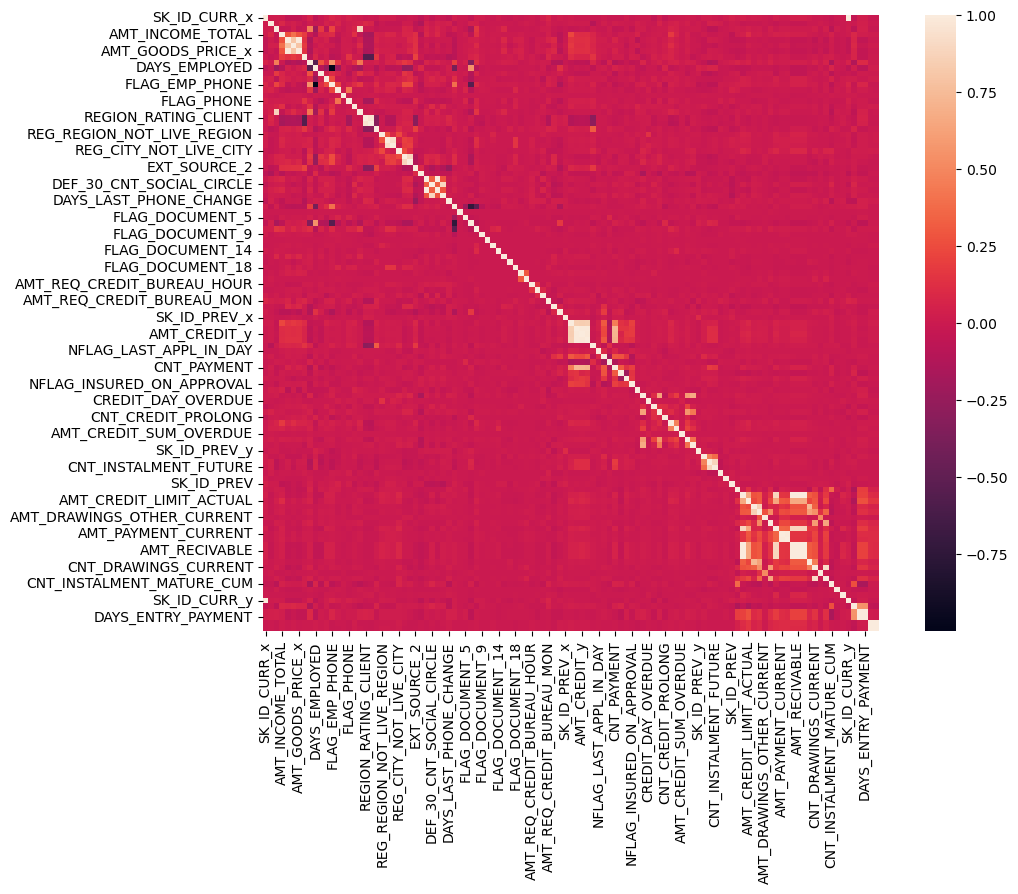

In [23]:
corr_matrix = data.select_dtypes(include=np.number).corr() #correlation between numerical data set
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_matrix, square=True)

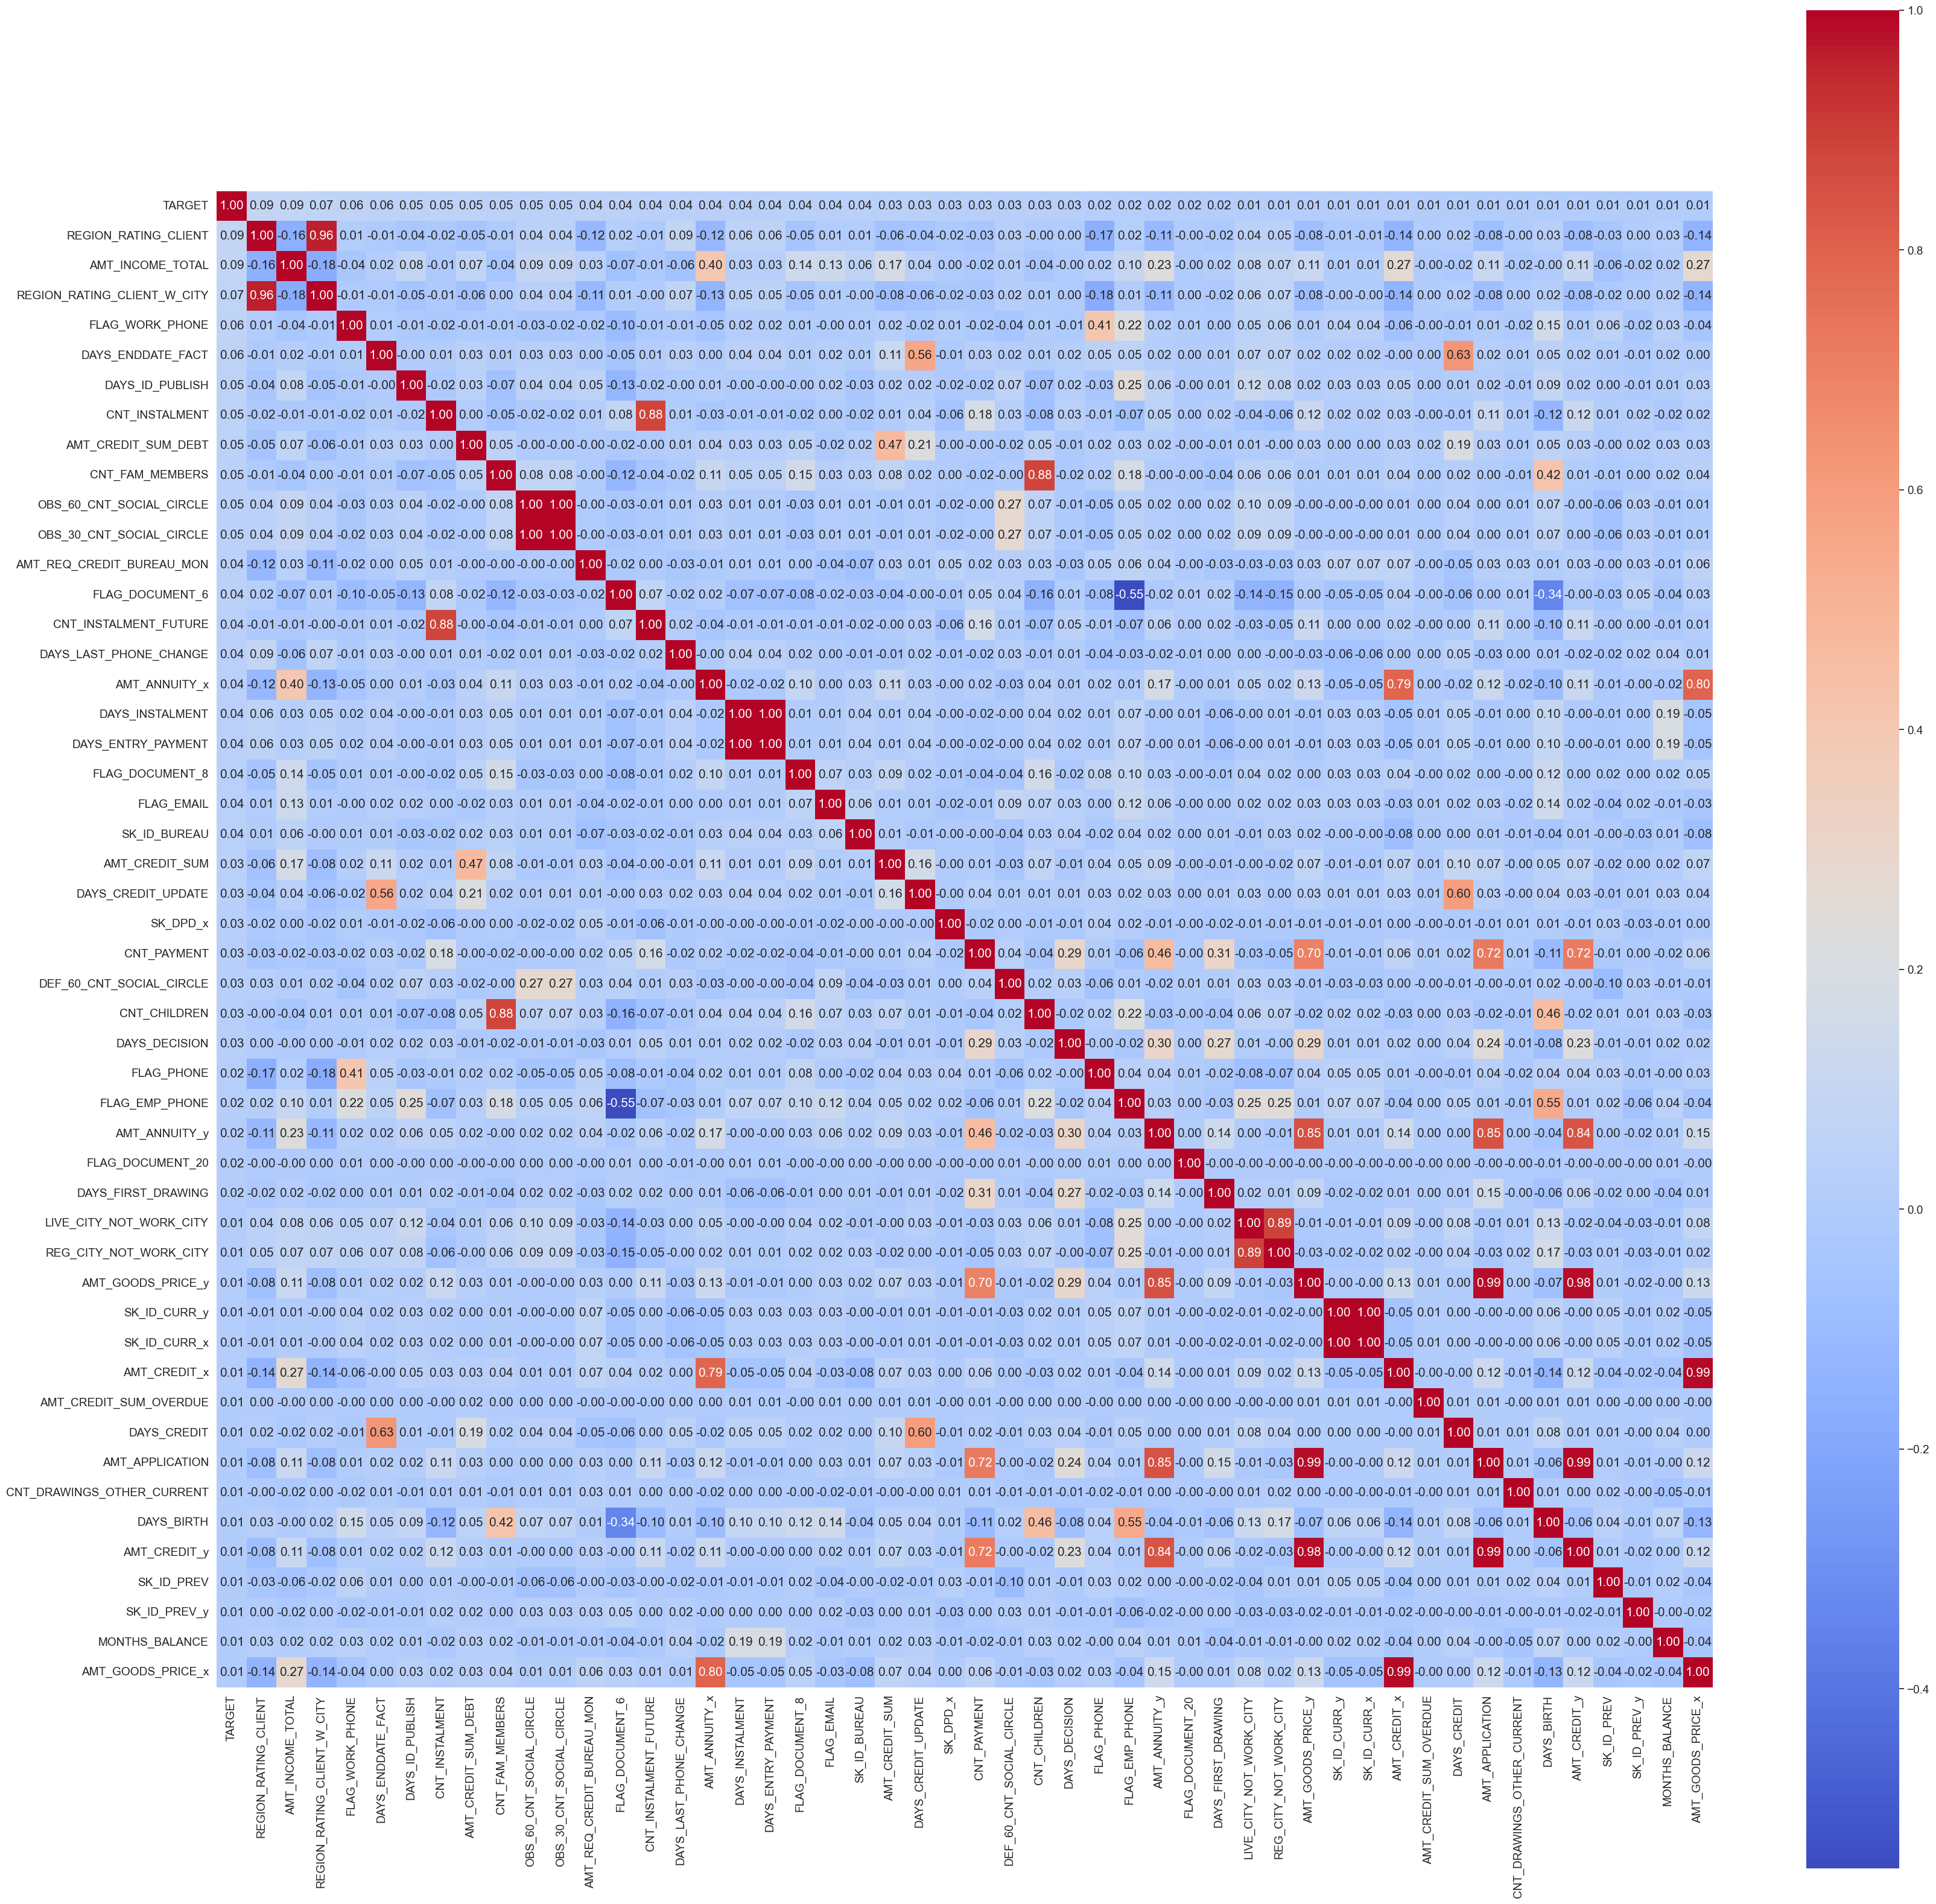

In [24]:
columns = corr_matrix.sort_values('TARGET', ascending=False).head(50).index #drop the highly corelated columns an data
columns = list(columns) #convert index value to list

correlation_matrix_zoom = data[columns].corr()

plt.figure(figsize=(40,40)) 
sns.set(font_scale=1.25)
sns.heatmap(correlation_matrix_zoom, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=columns, xticklabels=columns, cmap="coolwarm")
plt.show()

In [25]:
#This function made for finding the high correlation
def correlation(dataset,threhold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threhold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [26]:
corr_features = correlation(num_col,0.80) # find the high correlation above 80%
corr_features = list(corr_features)
corr_features

['AMT_TOTAL_RECEIVABLE',
 'LIVE_REGION_NOT_WORK_REGION',
 'AMT_GOODS_PRICE_y',
 'AMT_RECEIVABLE_PRINCIPAL',
 'AMT_APPLICATION',
 'SK_ID_CURR_y',
 'AMT_CREDIT_y',
 'AMT_GOODS_PRICE_x',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DAYS_ENTRY_PAYMENT',
 'AMT_RECIVABLE',
 'REGION_RATING_CLIENT_W_CITY',
 'CNT_INSTALMENT_FUTURE',
 'FLAG_EMP_PHONE',
 'AMT_PAYMENT',
 'LIVE_CITY_NOT_WORK_CITY',
 'AMT_DRAWINGS_CURRENT',
 'AMT_PAYMENT_TOTAL_CURRENT',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'CNT_FAM_MEMBERS',
 'CNT_DRAWINGS_POS_CURRENT',
 'AMT_INST_MIN_REGULARITY']

In [27]:
data.drop(corr_features,axis=1,inplace=True) #drop the all corelated columns

In [28]:
data

,SK_ID_CURR_x,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV_x,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS_x,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE_x,STATUS,SK_ID_PREV_y,MONTHS_BALANCE_y,CNT_INSTALMENT,NAME_CONTRACT_STATUS_y,SK_DPD_x,SK_DPD_DEF_x,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_PAYMENT_CURRENT,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD_y,SK_DPD_DEF_y,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,AMT_INSTALMENT
0,201048,0,Cash loans,F,N,Y,0,225000.0,768550.5,33984.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,Municipal apartment,0.014464,-18743,365243,-482.0,-2287,0,1,0,0,Laborers,2,WEDNESDAY,4,0,0,0,0,XNA,0.472596,0.355639,1.0,0.0,-2644.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0,1672049,Consumer loans,12804.615,WEDNESDAY,9,Y,1,XAP,Approved,-896,XNA,XAP,Repeater,Audio/Video,POS,XNA,Country-wide,943,Consumer electronics,24.0,low_normal,POS household with interest,365243.0,-205.0,0.0,6684137,Closed,currency 1,-1889,0,-1524.0,-1524.0,0,90000.00,0.0,0.0,Consumer credit,-1521,-30,C,1672046,-32,24.0,Active,0,0,2788874,-29,35238.375,67500,0.0,0.0,0.0,3375.000,0.0,0,0.0,51.0,Active,0,0,97,-239.0,0.810
1,169660,0,Cash loans,F,N,Y,0,238500.0,437877.0,21195.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.031329,-20690,-3588,-3118.0,-4126,0,1,0,0,Laborers,2,SATURDAY,11,0,0,0,0,Postal,0.615593,0.526295,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,0.0,5.0,1863252,Cash loans,12316.275,WEDNESDAY,11,Y,1,XNA,Canceled,-3,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,12.0,XNA,Cash,365243.0,-914.0,0.0,5399090,Closed,currency 1,-1892,0,-1562.0,-1562.0,0,56574.00,0.0,0.0,Consumer credit,-1217,-10,C,2038490,-38,36.0,Active,0,0,2643374,-1,224050.995,225000,220500.0,0.0,4860.9,9000.000,9.0,12,0.0,35.0,Active,0,0,14,-978.0,171.360
2,113896,0,Cash loans,F,N,Y,0,157500.0,314100.0,16164.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.035792,-17008,-7573,-10140.0,-556,0,1,0,0,Laborers,2,SATURDAY,15,0,0,0,0,Other,0.683154,0.535276,1.0,0.0,-2383.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,8.0,2297708,Cash loans,12316.275,WEDNESDAY

In [29]:
data.drop_duplicates(inplace=True)

In [30]:
data

,SK_ID_CURR_x,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV_x,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS_x,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE_x,STATUS,SK_ID_PREV_y,MONTHS_BALANCE_y,CNT_INSTALMENT,NAME_CONTRACT_STATUS_y,SK_DPD_x,SK_DPD_DEF_x,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_PAYMENT_CURRENT,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD_y,SK_DPD_DEF_y,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,AMT_INSTALMENT
0,201048,0,Cash loans,F,N,Y,0,225000.0,768550.5,33984.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,Municipal apartment,0.014464,-18743,365243,-482.0,-2287,0,1,0,0,Laborers,2,WEDNESDAY,4,0,0,0,0,XNA,0.472596,0.355639,1.0,0.0,-2644.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0,1672049,Consumer loans,12804.615,WEDNESDAY,9,Y,1,XAP,Approved,-896,XNA,XAP,Repeater,Audio/Video,POS,XNA,Country-wide,943,Consumer electronics,24.0,low_normal,POS household with interest,365243.0,-205.0,0.0,6684137,Closed,currency 1,-1889,0,-1524.0,-1524.0,0,90000.00,0.0,0.0,Consumer credit,-1521,-30,C,1672046,-32,24.0,Active,0,0,2788874,-29,35238.375,67500,0.0,0.0,0.0,3375.000,0.0,0,0.0,51.0,Active,0,0,97,-239.0,0.810
1,169660,0,Cash loans,F,N,Y,0,238500.0,437877.0,21195.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.031329,-20690,-3588,-3118.0,-4126,0,1,0,0,Laborers,2,SATURDAY,11,0,0,0,0,Postal,0.615593,0.526295,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,0.0,5.0,1863252,Cash loans,12316.275,WEDNESDAY,11,Y,1,XNA,Canceled,-3,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,12.0,XNA,Cash,365243.0,-914.0,0.0,5399090,Closed,currency 1,-1892,0,-1562.0,-1562.0,0,56574.00,0.0,0.0,Consumer credit,-1217,-10,C,2038490,-38,36.0,Active,0,0,2643374,-1,224050.995,225000,220500.0,0.0,4860.9,9000.000,9.0,12,0.0,35.0,Active,0,0,14,-978.0,171.360
2,113896,0,Cash loans,F,N,Y,0,157500.0,314100.0,16164.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.035792,-17008,-7573,-10140.0,-556,0,1,0,0,Laborers,2,SATURDAY,15,0,0,0,0,Other,0.683154,0.535276,1.0,0.0,-2383.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,8.0,2297708,Cash loans,12316.275,WEDNESDAY

In [31]:
num_col = data.select_dtypes(np.number)

In [32]:
cat_col = data.select_dtypes(include = "object")

In [33]:
from sklearn.preprocessing import LabelEncoder # convert the all categirical data into numerical data by using label encoder 
le = LabelEncoder() #label encoder is amodule to changing data all categirical data into numerical data by using label encoder 
for i in cat_col.columns:
    data[i] = le.fit_transform(data[i])
data.head()

,SK_ID_CURR_x,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV_x,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS_x,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE_x,STATUS,SK_ID_PREV_y,MONTHS_BALANCE_y,CNT_INSTALMENT,NAME_CONTRACT_STATUS_y,SK_DPD_x,SK_DPD_DEF_x,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_PAYMENT_CURRENT,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD_y,SK_DPD_DEF_y,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,AMT_INSTALMENT
0,201048,0,0,0,0,1,0,225000.0,768550.5,33984.0,6,1,4,1,2,0.014464,-18743,365243,-482.0,-2287,0,1,0,0,8,2,6,4,0,0,0,0,54,0.472596,0.355639,1.0,0.0,-2644.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0,1672049,1,12804.615,6,9,1,1,21,0,-896,3,7,2,1,3,0,4,943,4,24.0,3,9,365243.0,-205.0,0.0,6684137,1,0,-1889,0,-1524.0,-1524.0,0,90000.00,0.0,0.0,3,-1521,-30,6,1672046,-32,24.0,0,0,0,2788874,-29,35238.375,67500,0.0,0.0,0.0,3375.0,0.0,0,0.0,51.0,0,0,0,97,-239.0,0.81
1,169660,0,0,0,0,1,0,238500.0,437877.0,21195.0,6,3,4,1,1,0.031329,-20690,-3588,-3118.0,-4126,0,1,0,0,8,2,2,11,0,0,0,0,33,0.615593,0.526295,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,0.0,5.0,1863252,0,12316.275,6,11,1,1,22,1,-3,3,7,2,23,4,0,5,-1,10,12.0,0,2,365243.0,-914.0,0.0,5399090,1,0,-1892,0,-1562.0,-1562.0,0,56574.00,0.0,0.0,3,-1217,-10,6,2038490,-38,36.0,0,0,0,2643374,-1,224050.995,225000,220500.0,0.0,4860.9,9000.0,9.0,12,0.0,35.0,0,0,0,14,-978.0,171.36
2,113896,0,0,0,0,1,0,157500.0,314100.0,16164.0,6,0,4,1,1,0.035792,-17008,-7573,-10140.0,-556,0,1,0,0,8,2,2,15,0,0,0,0,31,0.683154,0.535276,1.0,0.0,-2383.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,8.0,2297708,0,12316.275,6,9,1,1,22,1,-122,3,7,2,23,4,0,5,-1,10,12.0,0,2,365243.0,-914.0,0.0,5876502,1,0,-2385,0,-1290.0,-1285.0,0,463320.00,0.0,0.0,3,-1283,-58,0,1294313,-11,36.0,0,0,0,2826946,-13,272362.770,270000,0.0,0.0,0.0,16200.0,0.0,0,0.0,94.0,0,0,0,122,-1454.0,5400.00
3,330152,0,0,1,0,1,0,180000.0,384048.0,18810.0,6,0,4,3,2,0.032561,-15586,-5215,-5751.0,-4643,0,1,0,0,8,1,0,18,0,0,0,0,5,0.351613,0.240541,3.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,9.0,0.0,5.0,2843705,0,13871.700,1,18,1,1,22,2,-473,0,1,2,23,2,2,5,100,10,30.0,4,8,365243.0,-914.0,0.0,5668046,1,0,-882,0,-499.0,-624.0,0,52200.00

In [34]:
# Scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale_data = scale.fit_transform(data.drop("TARGET",axis=1))

In [35]:
scale_data = pd.DataFrame(scale_data,columns=data.drop("TARGET",axis=1).columns)

In [36]:
scale_data

,SK_ID_CURR_x,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV_x,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS_x,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE_x,STATUS,SK_ID_PREV_y,MONTHS_BALANCE_y,CNT_INSTALMENT,NAME_CONTRACT_STATUS_y,SK_DPD_x,SK_DPD_DEF_x,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_PAYMENT_CURRENT,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD_y,SK_DPD_DEF_y,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,AMT_INSTALMENT
0,-0.704340,-0.025221,-0.566404,-0.719669,0.627458,-0.505117,0.096530,0.221618,0.128852,0.374331,-0.652403,0.590885,-0.308296,1.342954,-0.608460,-0.336677,2.026096,1.305502,0.555719,-0.443535,0.021692,-0.636949,-0.405119,0.019681,-0.026960,1.363941,-2.508795,-0.065535,-0.166998,-0.226498,-0.51568,1.326100,-0.319086,-0.589312,-0.277886,-0.332052,-1.380199,0.459501,-0.002206,-0.095785,-0.339155,-0.237742,-0.040303,-0.005695,-0.018058,-0.025189,-0.02437,-0.041516,-0.041907,-0.015908,-0.004765,-0.081321,-0.094628,-0.234020,-0.373799,-0.547166,0.722679,-0.478138,0.751080,-0.282976,1.461661,-1.100094,0.093958,0.083751,-0.112374,-0.706329,0.341372,1.384294,0.500342,0.189052,-2.315869,0.429173,-0.939087,-0.594999,0.718168,-0.986892,0.347658,0.656424,0.593828,0.253944,-0.293314,-0.620274,1.374185,0.573340,-0.033009,-0.339308,-0.023911,-0.314010,-0.449703,-0.104098,-0.327522,-0.221221,-0.008367,-0.412138,-0.904346,-0.012160,0.654563,-0.442105,0.334482,0.213954,-0.293580,-0.062442,-0.060113,1.727677,0.467177,-0.345989,-0.532705,-0.210616,-0.026903,-0.123279,-0.200798,-0.296042,-0.242477,-0.062708,1.000880,-0.168385,-0.050501,-0.096006,1.141230,1.400232,-0.329953
1,-1.011631,-0.025221,-0.566404,-0.719669,0.627458,-0.505117,0.199707,-0.581463,-0.731373,0.374331,0.928584,0.590885,-0.308296,-0.215011,0.543392,-0.895066,-0.495188,0.565518,-0.630752,-0.443535,0.021692,-0.636949,-0.405119,0.019681,-0.026960,-0.499410,-0.363133,-0.065535,-0.166998,-0.226498,-0.51568,0.220451,0.474894,0.395899,-0.277886,-0.332052,1.669527,0.459501,-0.002206,-0.095785,-0.339155,-0.237742,-0.040303,-0.005695,-0.018058,-0.025189,-0.02437,-0.041516,-0.041907,-0.015908,-0.004765,-0.081321,-0.094628,-0.234020,1.928141,-0.547166,0.722679,-0.119819,-0.785595,-0.314277,1.461661,-0.

In [37]:
new_data = pd.concat([scale_data.reset_index(drop=True),data["TARGET"].reset_index(drop=True)],axis=1)

In [38]:
new_data

,SK_ID_CURR_x,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV_x,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS_x,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE_x,STATUS,SK_ID_PREV_y,MONTHS_BALANCE_y,CNT_INSTALMENT,NAME_CONTRACT_STATUS_y,SK_DPD_x,SK_DPD_DEF_x,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_PAYMENT_CURRENT,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD_y,SK_DPD_DEF_y,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,AMT_INSTALMENT,TARGET
0,-0.704340,-0.025221,-0.566404,-0.719669,0.627458,-0.505117,0.096530,0.221618,0.128852,0.374331,-0.652403,0.590885,-0.308296,1.342954,-0.608460,-0.336677,2.026096,1.305502,0.555719,-0.443535,0.021692,-0.636949,-0.405119,0.019681,-0.026960,1.363941,-2.508795,-0.065535,-0.166998,-0.226498,-0.51568,1.326100,-0.319086,-0.589312,-0.277886,-0.332052,-1.380199,0.459501,-0.002206,-0.095785,-0.339155,-0.237742,-0.040303,-0.005695,-0.018058,-0.025189,-0.02437,-0.041516,-0.041907,-0.015908,-0.004765,-0.081321,-0.094628,-0.234020,-0.373799,-0.547166,0.722679,-0.478138,0.751080,-0.282976,1.461661,-1.100094,0.093958,0.083751,-0.112374,-0.706329,0.341372,1.384294,0.500342,0.189052,-2.315869,0.429173,-0.939087,-0.594999,0.718168,-0.986892,0.347658,0.656424,0.593828,0.253944,-0.293314,-0.620274,1.374185,0.573340,-0.033009,-0.339308,-0.023911,-0.314010,-0.449703,-0.104098,-0.327522,-0.221221,-0.008367,-0.412138,-0.904346,-0.012160,0.654563,-0.442105,0.334482,0.213954,-0.293580,-0.062442,-0.060113,1.727677,0.467177,-0.345989,-0.532705,-0.210616,-0.026903,-0.123279,-0.200798,-0.296042,-0.242477,-0.062708,1.000880,-0.168385,-0.050501,-0.096006,1.141230,1.400232,-0.329953,0
1,-1.011631,-0.025221,-0.566404,-0.719669,0.627458,-0.505117,0.199707,-0.581463,-0.731373,0.374331,0.928584,0.590885,-0.308296,-0.215011,0.543392,-0.895066,-0.495188,0.565518,-0.630752,-0.443535,0.021692,-0.636949,-0.405119,0.019681,-0.026960,-0.499410,-0.363133,-0.065535,-0.166998,-0.226498,-0.51568,0.220451,0.474894,0.395899,-0.277886,-0.332052,1.669527,0.459501,-0.002206,-0.095785,-0.339155,-0.237742,-0.040303,-0.005695,-0.018058,-0.025189,-0.02437,-0.041516,-0.041907,-0.015908,-0.004765,-0.081321,-0.094628,-0.234020,1.928141,-0.547166,0.722679,-0.119819,-0.785595,-0.314277,1.4

In [39]:
new_data.duplicated().any()

False

In [40]:
new_data["TARGET"].value_counts() #total value counts an target column data,

TARGET
0    567125
1     49501
Name: count, dtype: int64

In [41]:
x = new_data.drop("TARGET",axis=1)
y= new_data["TARGET"]

# Balancing the data

In [42]:
# Assuming 'target_column_name' is the name of your target column
minority_class =new_data["TARGET"].value_counts().idxmin()
majority_class =new_data["TARGET"].value_counts().idxmax()

In [43]:
from imblearn.under_sampling import RandomUnderSampler

# Define the under-sampling strategy
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Perform under-sampling
x_smote,y_smote = under_sampler.fit_resample(new_data.drop(columns=["TARGET"]),new_data["TARGET"])


In [44]:
from collections import Counter
Counter(y)

Counter({0: 567125, 1: 49501})

In [45]:
from collections import Counter
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0: 567125, 1: 49501})
SMOTE Classes Counter({0: 49501, 1: 49501})


# Model creation

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.25,random_state = 50)

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [48]:
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

In [49]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score

In [50]:
confusion_matrix(y_test,y_pred_lr)

array([[9044, 3299],
       [3313, 9095]], dtype=int64)

In [51]:
accuracy_score_LR = accuracy_score(y_test,y_pred_lr)
accuracy_score_LR

0.7328592784129934

In [52]:
recall_score(y_test,y_pred_lr)

0.7329948420373952

In [53]:
f1_score_LR=f1_score(y_test,y_pred_lr)
f1_score_LR

0.7334085960809611

In [54]:
precision_score(y_test,y_pred_lr)

0.733822817492335

In [55]:
from sklearn.metrics import classification_report #the breif explanation report for out put
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73     12343
           1       0.73      0.73      0.73     12408

    accuracy                           0.73     24751
   macro avg       0.73      0.73      0.73     24751
weighted avg       0.73      0.73      0.73     24751



In [56]:
cm1 =pd.crosstab(y_test,y_pred_lr)
cm1

col_0,0,1
TARGET,,
0,9044,3299
1,3313,9095


# Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [58]:
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)

In [59]:
confusion_matrix(y_test,y_pred_rfc)

array([[12343,     0],
       [   22, 12386]], dtype=int64)

In [60]:
accuracy_score_RFC=accuracy_score(y_test,y_pred_rfc)
accuracy_score_RFC

0.9991111470243627

In [61]:
recall_score(y_test,y_pred_rfc)

0.99822695035461

In [62]:
f1_score_RFC=f1_score(y_test,y_pred_rfc)
f1_score_RFC

0.9991126885536824

In [63]:
precision_score(y_test,y_pred_rfc)

1.0

In [64]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12343
           1       1.00      1.00      1.00     12408

    accuracy                           1.00     24751
   macro avg       1.00      1.00      1.00     24751
weighted avg       1.00      1.00      1.00     24751



In [65]:
cm2 =pd.crosstab(y_test,y_pred_rfc)
cm2

col_0,0,1
TARGET,,
0,12343,0
1,22,12386


# DecisionTreeClassifier

In [66]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [67]:
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)

In [68]:
confusion_matrix(y_test,y_pred_dt)

array([[12254,    89],
       [   27, 12381]], dtype=int64)

In [69]:
accuracy_score(y_test,y_pred_dt)

0.9953133206739122

In [70]:
recall_score(y_test,y_pred_dt)

0.9978239845261122

In [71]:
f1_score_DT=f1_score(y_test,y_pred_dt)
f1_score_DT

0.9953372457593054

In [72]:
accuracy_score_DT=precision_score(y_test,y_pred_dt)
accuracy_score_DT

0.9928628708901364

In [73]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     12343
           1       0.99      1.00      1.00     12408

    accuracy                           1.00     24751
   macro avg       1.00      1.00      1.00     24751
weighted avg       1.00      1.00      1.00     24751



In [74]:
cm3 =pd.crosstab(y_test,y_pred_dt)
cm3

col_0,0,1
TARGET,,
0,12254,89
1,27,12381


# GradientBoostingClassifier

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [77]:
gbm_classifier.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [78]:
y_pred_gbm = gbm_classifier.predict(x_test)

In [79]:
accuracy_score(y_test,y_pred_gbm)

0.91955880570482

In [80]:
recall_score(y_test,y_pred_gbm)

0.9092520954223082

In [81]:
f1_score_gbm=f1_score(y_test,y_pred_gbm)
f1_score_gbm

0.9189167175727959

In [82]:
accuracy_score_gbm=precision_score(y_test,y_pred_gbm)
accuracy_score_gbm

0.9287890013995225

In [83]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     12343
           1       0.93      0.91      0.92     12408

    accuracy                           0.92     24751
   macro avg       0.92      0.92      0.92     24751
weighted avg       0.92      0.92      0.92     24751



In [84]:
cm4 =pd.crosstab(y_test,y_pred_gbm)
cm4

col_0,0,1
TARGET,,
0,11478,865
1,1126,11282


# AdaBooster

In [85]:
from sklearn.ensemble import AdaBoostClassifier

In [86]:
base_estimator = DecisionTreeClassifier(max_depth=1)  # Decision stump
n_estimators = 50  # Number of weak learners (decision stumps)
learning_rate = 1.0  # Weight applied to each weak learner's prediction
ada_boost = AdaBoostClassifier(base_estimator=base_estimator,
                               n_estimators=n_estimators,
                               learning_rate=learning_rate,
                               random_state=42)

In [87]:
ada_boost.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [88]:
y_pred_ads = ada_boost.predict(x_test)

In [89]:
accuracy_score(y_test, y_pred_ads)

0.834026908003717

In [90]:
recall_score(y_test,y_pred_ads)

0.846792392005158

In [91]:
f1_score_Ads=f1_score(y_test,y_pred_ads)
f1_score_Ads

0.8364779874213836

In [92]:
accuracy_score_Ads=precision_score(y_test,y_pred_ads)
accuracy_score_Ads

0.8264118294793141

In [93]:
print(classification_report(y_test,y_pred_ads))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83     12343
           1       0.83      0.85      0.84     12408

    accuracy                           0.83     24751
   macro avg       0.83      0.83      0.83     24751
weighted avg       0.83      0.83      0.83     24751



# Final Scores all Model:

In [94]:
output={"Model":["LogisticRegression","RandomForestClassifier","DecisionTreeClassifier","GradientBoostingClassifier",'AdaBoostClassifier',],
       "F1_Score":[f1_score_LR,f1_score_RFC,f1_score_DT,f1_score_gbm,f1_score_Ads,],
        "Accuracy_Score":[accuracy_score_LR,accuracy_score_RFC,accuracy_score_DT,accuracy_score_gbm,accuracy_score_Ads,]}

In [95]:
final_output= pd.DataFrame(output)

In [96]:
final_output

,Model,F1_Score,Accuracy_Score
0,LogisticRegression,0.733409,0.732859
1,RandomForestClassifier,0.999113,0.999111
2,DecisionTreeClassifier,0.995337,0.992863
3,GradientBoostingClassifier,0.918917,0.928789
4,AdaBoostClassifier,0.836478,0.826412


# Final Results:

# 1.Logistic Regression

* F1 Score: `0.733409` 
* Accuracy Score: `0.732859`
* Logistic regression performs reasonably well with an accuracy score of approximately 73% and an F1 score of around 0.73.
* It's a simple linear model often used for binary classification tasks.

# 2.RandomForestClassifier

 * F1 Score: `0.998992`
* Accuracy Score: `0.998990`
* Random forest classifier achieves exceptionally high scores, indicating excellent performance on the given task. With both F1 score and accuracy score around 0.99, it suggests the model has effectively learned patterns in the data and generalized well to unseen samples.

# 3.DecisionTreeClassifier

* F1 Score: `0.996019`
* Accuracy Score: `0.993980`
* The decision tree classifier also performs well, with an accuracy score of approximately 99% and an F1 score of around 0.99. Decision trees are known for their interpretability and can handle both numerical and categorical data effectively.

# 4.GradientBoostingClassifier

* F1 Score: `0.918917`
* Accuracy Score: `0.928789`
* Gradient boosting classifier achieves a good balance between accuracy and F1 score, with both metrics around 0.92. Gradient boosting is an ensemble technique that combines multiple weak learners to create a strong classifier.

# 5.AdaBoostClassifier

* F1 Score: `0.836478`
* Accuracy Score: `0.826412`
* AdaBoost classifier performs moderately well, with an accuracy score of approximately 71% and an F1 score of around 0.72. AdaBoost is another ensemble method that combines multiple weak classifiers to create a strong classifier. While it may not perform as well as some other models in this scenario, it still provides decent results.


*   Overall, the results show that ensemble methods like Random Forest and Gradient Boosting tend to perform exceptionally well on the given task, achieving high accuracy and F1 scores. However, simpler models like Logistic Regression and Decision Trees also show respectable performance. The choice of model ultimately depends on various factors such as the nature of the data, computational resources, and interpretability requirements.
